In [4]:
import os

# for dirname, _,filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        



In [5]:
import time
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

C:\Users\Galaxy Tab\anaconda4\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

Accuracy Score: 0.9786904761904762
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.97      0.98       846
           3       0.98      0.97      0.97       937
           4       0.97      0.97      0.97       839
           5       0.98      0.97      0.98       702
           6       0.98      0.99      0.99       785
           7       0.98      0.97      0.98       893
           8       0.97      0.98      0.98       835
           9       0.96      0.97      0.96       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



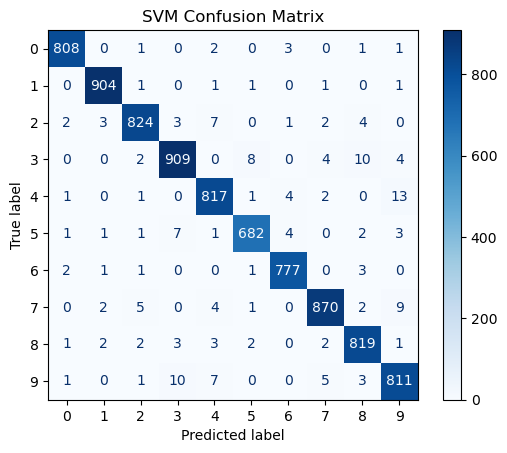

In [12]:
X = train_df.drop("label", axis=1).values
y = train_df["label"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA dimension reduction
# PCA 降维
pca = PCA(n_components=100)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

# Build a model
# 建立模型
clf = SVC()
clf.fit(X_train, y_train)

# Test classification effect
# 检验分类效果
y_val_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
cr = classification_report(y_val, y_val_pred)

print(f"Accuracy Score: {acc}")
print(f"Classification Report: \n{cr}")

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

In [14]:
# Predict the outcome
# 预测结果 
X_test = pca.transform(test_df.values)
pred_df = pd.DataFrame({"ImageId": test_df.index + 1, "Label": clf.predict(X_test)})
pred_df.to_csv("submission_other.csv", index=False)
pred_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [ ]:
pred_df